<a href="https://colab.research.google.com/github/Saanimustapha/AbaloneAgePrediction/blob/main/Group15_LassoRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data = pd.read_csv('abalone.csv')

In [ ]:
numeric_cols = data.select_dtypes(include=[np.number]).columns

factor = 1.5

for col in numeric_cols:
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - factor * IQR
    upper_bound = Q3 + factor * IQR
    data[col] = np.clip(data[col], lower_bound, upper_bound)

In [ ]:
data_encoded = pd.get_dummies(data, columns=['sex'])

In [ ]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import Lasso, ElasticNet, Ridge
from sklearn.metrics import mean_squared_error
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
import time
import math

In [ ]:
X = data_encoded.drop(columns=[' rings'])
y = data_encoded[' rings']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('lasso', Lasso())
])


param_grid = {
    'lasso__alpha': np.logspace(-8, 7, 50),
    'lasso__max_iter': [1000, 5000, 10000],
    'lasso__tol': [1e-4, 1e-3, 1e-2],
    'lasso__selection': ['cyclic', 'random'],
    'lasso__fit_intercept': [True, False]
}

# Perform grid search with cross-validation
grid_search = GridSearchCV(estimator=pipeline, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')

start_time = time.time()
grid_search.fit(X_train, y_train)
end_time = time.time()

training_time = end_time - start_time
print(f'Training time: {training_time:.2f} seconds')

# Get the best parameters
best_params = grid_search.best_params_
print(f'Best parameters: {best_params}')

# Get the best pipeline
best_pipeline = grid_search.best_estimator_

# Make predictions
y_pred = best_pipeline.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = math.sqrt(mse)
print(f'Root Mean Squared Error with best parameters: {rmse}')

# Get the coefficients of the best Lasso model
best_lasso = best_pipeline.named_steps['lasso']
print(f'Coefficients: {best_lasso.coef_}')

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.941e+02, tolerance: 2.042e+00
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.483e+03, tolerance: 2.033e+00
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.512e+03, tolerance: 2.024e

Training time: 625.56 seconds
Best parameters: {'lasso__alpha': 0.00019306977288832496, 'lasso__fit_intercept': True, 'lasso__max_iter': 10000, 'lasso__selection': 'random', 'lasso__tol': 0.01}
Root Mean Squared Error with best parameters: 1.7971256396888753
Coefficients: [ 0.12153149  0.99845363  0.66291304  3.13856175 -3.62459511 -0.75444283
  0.86361066  0.07596104 -0.31221674  0.09954154]


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.861e+02, tolerance: 2.523e+00
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.861e+02, tolerance: 2.523e+00
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.861e+02, tolerance: 2.523e

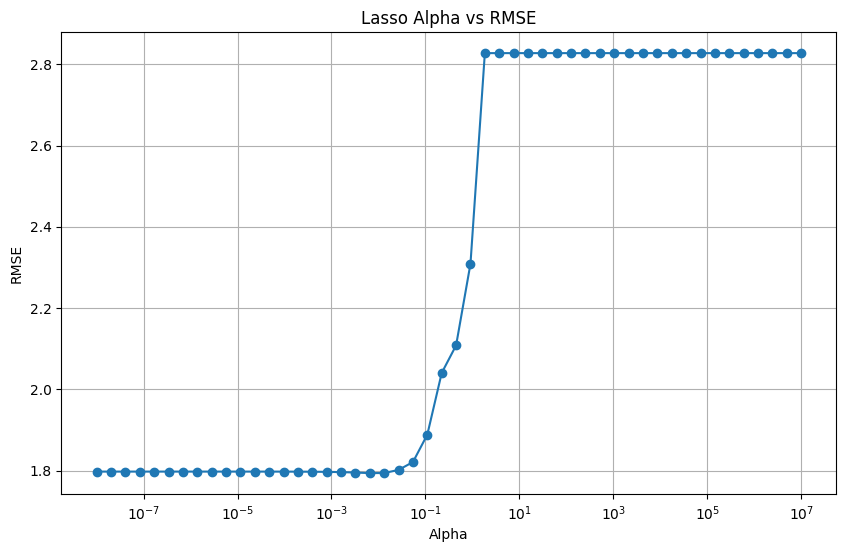

In [ ]:
# Define the range of alpha values
alpha_values = np.logspace(-8, 7, 50)
rmse_values = []

# Loop through alpha values, fit the model, and calculate RMSE
for alpha in alpha_values:
    pipeline = Pipeline([
        ('scaler', StandardScaler()),
        ('lasso', Lasso(alpha=alpha, max_iter=10000))
    ])
    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    rmse = math.sqrt(mse)
    rmse_values.append(rmse)

# Plot alpha vs RMSE
plt.figure(figsize=(10, 6))
plt.plot(alpha_values, rmse_values, marker='o')
plt.xscale('log')
plt.xlabel('Alpha')
plt.ylabel('RMSE')
plt.title('Lasso Alpha vs RMSE')
plt.grid(True)
plt.show()
